In [1]:
library(tidyverse)  
data<- read_csv('diabetes.csv')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Rows: 768 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:

data <- mutate(data,age_category=case_when(Age<30~'younge',Age>=30&Age<50~'Medium age',Age>= 50~'Old'))

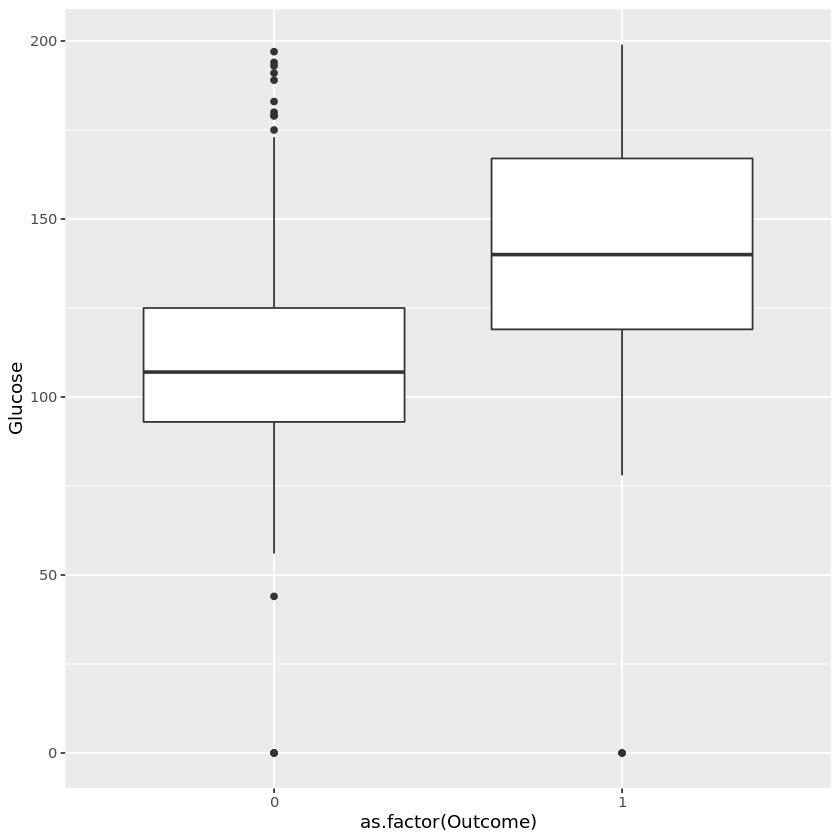

In [2]:

#t-test
diabetes_yes <- filter(data,Outcome==1) 
diabetes_no <- filter(data,Outcome==0) 
t.test(diabetes_yes$Age,diabetes_no$Age)
#visualization
pl <- ggplot(data,aes(x=as.factor(Outcome),y=Glucose))+geom_boxplot()
pl



In [5]:
diabetes_Glucose_anova <- aov(Glucose~age_category,data=data)
summary(diabetes_Glucose_anova)


              Df Sum Sq Mean Sq F value   Pr(>F)    
age_category   2  56062   28031   29.46 4.74e-13 ***
Residuals    765 728002     952                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1